In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
sms_raw = pd.read_csv("imdb_labelled.txt", delimiter= '\t', header=None)
sms_raw.columns = ['feedback', 'Good']

In [21]:
sms_raw.head(100)

feedback  Good   good  \
0   A very, very, very slow-moving, aimless movie ...     0  False   
1   Not sure who was more lost - the flat characte...     0  False   
2   Attempting artiness with black & white and cle...     0  False   
3        Very little music or anything to speak of.       0  False   
4   The best scene in the movie was when Gerardo i...     1  False   
5   The rest of the movie lacks art, charm, meanin...     0  False   
6                                 Wasted two hours.       0  False   
7   Saw the movie today and thought it was a good ...     1   True   
8                                A bit predictable.       0  False   
9   Loved the casting of Jimmy Buffet as the scien...     1  False   
10               And those baby owls were adorable.       1  False   
11  The movie showed a lot of Florida at it's best...     1  False   
12  The Songs Were The Best And The Muppets Were S...     1  False   
13                                  It Was So Cool.       1  False   
14  This is a very "right on case" movie that deli...     1  False   
15  It had some average acting from the main perso...     0  False   
16  This review is long overdue, since I consider ...     1  False   
17  I'll put this gem up against any movie in term...     1  False   
18  It's practically perfect in all of them  a tr...     1  False   
19   The structure of this film is easily the most...     0   True   
20  This if the first movie I've given a 10 to in ...     1  False   
21  If there was ever a movie that needed word-of-...     1  False   
22  Overall, the film is interesting and thought-p...     1  False   
23  Plus, it was well-paced and suited its relativ...     1  False   
24                            Give this one a look.       1  False   
25                                   I gave it a 10       1  False   
26  The Wind and the Lion is well written and supe...     1  False   
27                            It is a true classic.       1  False   
28  It actually turned out to be pretty decent as ...     1  False   
29                   Definitely worth checking out.       1  False   
..                                                ...   ...    ...   
70  There were several moments in the movie that j...     0  False   
71  This was a poor remake of "My Best Friends Wed...     0  False   
72              All in all, a great disappointment.       0  False   
73  I cannot believe that the actors agreed to do ...     0  False   
74  I could not stand to even watch it for very lo...     0  False   
75  I guess that nobody at the network that aired ...     0  False   
76  IMDB ratings only go as low 1 for awful, it's ...     0  False   
77  I saw "Mirrormask" last night and it was an un...     0  False   
78  Unfortunately, inexperience of direction meant...     0  False   
79  These are the central themes of the film and t...     0  False   
80  All the pretty pictures in the world cannot ma...     0  False   
81  It is an hour and half waste of time, followin...     0  False   
82  You can't relate with them, hell you barely ca...     0  False   
83  This is definitely a cult classic well worth v...     1  False   
84  This movie is a pure disaster, the story is st...     0  False   
85  The fish is badly made and some of its underwa...     0  False   
86                         A truly, truly bad film.       0  False   
87  The acting is terrible, and the writing is wor...     0  False   
88  The only possible way this movie could be rede...     0  False   
89                                 I paid too much.       0  False   
90  Also, it's a real treat to see Anthony Quinn p...     1  False   
91                                It was so BORING!       0  False   
92                              No plot whatsoever!       0  False   
93                           Again, no plot at all.       0  False   
94                                        Horrible!       0  False   
95     Worst hour and a half of my life!Oh my gosh!    

In [31]:
keywords = ['good', 'entertaining', 'best', 'well', 'beautiful', 'genius', 'funny', 'loved', '10','pretty','classic']

for key in keywords:
    sms_raw[str(key)] = sms_raw.feedback.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

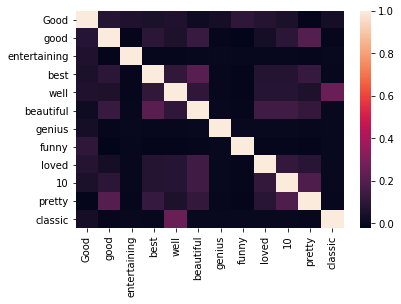

In [32]:
sns.heatmap(sms_raw.corr())

In [33]:
data = sms_raw[keywords]
target = sms_raw['Good']

In [40]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

clf = MultinomialNB()
bnb = BernoulliNB()
gnb = GaussianNB()

# Fit our model to the data.
#clf.fit(data, target)
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 748 points : 331
